In [21]:
import io
import pandas as pd
import csv
import tensorflow as tf
import numpy as np
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [28]:
with open('BBC News Train.csv', 'r') as c:
    print(c.readline())
    print(c.readline())

ArticleId,Text,Category

1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (Â£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and prac

In [ ]:
vs = 1000
ed = 16
ml = 120
ts = 0.8
pt = 'post'
ot = '<x>'

In [12]:
def rsw(s):
    sw = stopwords.words('english')
    
    s = s.lower()
    s = s.split()
    s = [w for w in s if w not in sw]
    s = ' '.join(str(x) for x in s)
    return s

In [13]:
rsw('I am a Google ML engineer')

'google ml engineer'

In [14]:
def par(f):
    
    s=[]
    l=[]
    with open(f,'r') as c:
        r = csv.reader(c,delimiter=',')
        next(r)
        
        for i in r:
            i[1]=rsw(i[1])
            s.append(i[1])
            l.append(i[2])
    return s,l

In [20]:
s,l = par('BBC News Train.csv')

In [17]:
print(len(s))
print(len(s[0].split()))
print(len(l))
print(l[:10])

1490
193
1490
['business', 'business', 'business', 'tech', 'business', 'politics', 'sport', 'entertainment', 'business', 'entertainment']


In [47]:
def tv(s,l):
    
    ts=1192
    
    rs=s[0:ts]
    rl=l[0:ts]
    
    vs=s[ts:]
    vl=l[ts:]
    
    return rs,vs,rl,vl

In [32]:
rs,vs,rl,vl = tv(s,l)

In [42]:
print(len(rs))
print(len(rl))
print(len(vs))
print(len(vl))

1192
1192
298
298


In [52]:
def tok(rs):
    t = Tokenizer(num_words=1000,oov_token='<x>')
    t.fit_on_texts(rs)
    w = t.word_index
    return t

In [53]:
t = tok(rs)

In [54]:
def qp(t,s):
    q = t.texts_to_sequences(s)
    p = pad_sequences(q,maxlen = 120, padding = 'post')
    return p

In [55]:
rp = qp(t,rs)
vp = qp(t,vs)

In [43]:
def tokl(l,sl):
    lt = Tokenizer(num_words=6)
    lt.fit_on_texts(l)
    lq = lt.texts_to_sequences(sl)
    lq = np.array(lq,dtype=int)-1
    return lq

In [44]:
rlq = tokl(l,rl)
vlq = tokl(l,vl)

In [56]:
rlq[:5]

array([[1],
       [1],
       [1],
       [4],
       [1]])

In [64]:
def cm():
    
    tf.random.set_seed(123)
    
    m = tf.keras.Sequential([tf.keras.layers.Embedding(1000,16,input_length=120),
                                tf.keras.layers.GlobalAveragePooling1D(),
                                tf.keras.layers.Dense(6, activation='relu'),
                                tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    m.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    return m

In [66]:
m = cm()
h = m.fit(rp,rlq,epochs=30,validation_data=(vp,vlq))

Epoch 1/30
38/38 [==============================] - 2s 13ms/step - loss: 1.6040 - accuracy: 0.2576 - val_loss: 1.5992 - val_accuracy: 0.3792
Epoch 2/30
38/38 [==============================] - 0s 4ms/step - loss: 1.5896 - accuracy: 0.4010 - val_loss: 1.5839 - val_accuracy: 0.3893
Epoch 3/30
38/38 [==============================] - 0s 7ms/step - loss: 1.5683 - accuracy: 0.4203 - val_loss: 1.5618 - val_accuracy: 0.3658
Epoch 4/30
38/38 [==============================] - 0s 5ms/step - loss: 1.5379 - accuracy: 0.4295 - val_loss: 1.5293 - val_accuracy: 0.4295
Epoch 5/30
38/38 [==============================] - 0s 7ms/step - loss: 1.4953 - accuracy: 0.4664 - val_loss: 1.4821 - val_accuracy: 0.4597
Epoch 6/30
38/38 [==============================] - 0s 5ms/step - loss: 1.4367 - accuracy: 0.5025 - val_loss: 1.4223 - val_accuracy: 0.5168
Epoch 7/30
38/38 [==============================] - 0s 7ms/step - loss: 1.3636 - accuracy: 0.5638 - val_loss: 1.3511 - val_accuracy: 0.5604
Epoch 8/30
38/38 [=

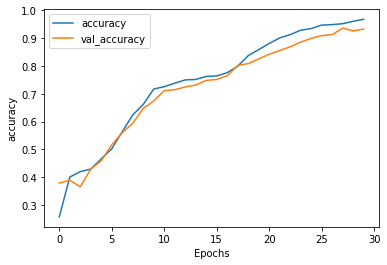

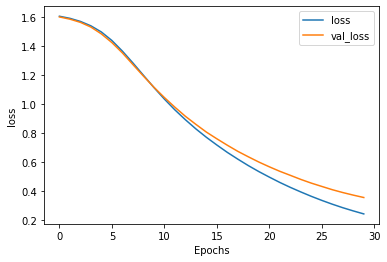

In [68]:
def pg(h, metric):
    plt.plot(h.history[metric])
    plt.plot(h.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
pg(h, "accuracy")
pg(h, "loss")

In [69]:
rwi = t.index_word
el = m.layers[0]
ew = el.get_weights()[0]
ew.shape

(1000, 16)

In [72]:
ov = io.open('vecs.tsv', 'w', encoding='utf-8')
om = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 1000):
    wn = rwi[word_num]
    we = ew[word_num]
    om.write(wn + "\n")
    ov.write('\t'.join([str(x) for x in we]) + "\n")
ov.close()
om.close()